Farmers often struggle to determine the best crops to grow based on soil conditions and to predict future yields accurately. To solve this, we will build a **Machine Learning-powered Crop Recommendation and Yield Prediction System**. Using a dataset of soil properties (like Nitrogen, pH, and Potassium levels), we will **analyze, clean, and select key features**, then train two models: one for **recommending the best crop** (classification) and another for **predicting future yield** (regression). Finally, we will optimize and deploy the model as a **user-friendly web app**, allowing farmers to input soil data and get instant predictions.

We will start by reading the dataset

## **Loaded and Cleaned the Dataset**  

In [21]:
import pandas as pd
CropAndSoilFile_path = r'C:\Users\pc\Documents\Datasets\Crop and Soil\data_core.csv'
allData = pd.read_csv(CropAndSoilFile_path)

In [22]:
allData.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


In [23]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


**Checked for null values

**Check for null values**

In [24]:
print(allData.isnull().sum())

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


**Check for duplicated rows**

In [25]:
print(f"Duplicate rows: {allData.duplicated().sum()}")

Duplicate rows: 0


In [26]:
allData.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,30.338895,59.210731,43.580862,18.429125,3.916375,18.512500
std,4.478262,8.177366,12.596156,11.852406,5.494807,13.244113
min,20.000000,40.020000,20.000000,0.000000,0.000000,0.000000
25%,27.050000,53.277500,33.967500,9.000000,0.000000,8.000000
50%,30.240000,59.110000,42.250000,14.000000,1.000000,18.000000
75%,33.460000,65.082500,52.950000,26.000000,5.000000,30.000000
max,40.000000,80.000000,70.000000,46.000000,23.000000,46.000000


**Explored dataset structure (Checked unique values in categorical columns)**

In [27]:
print("Soil Types:", allData["Soil Type"].unique())
print(allData["Soil Type"].value_counts())

Soil Types: ['Sandy' 'Loamy' 'Black' 'Red' 'Clayey']
Soil Type
Clayey    1623
Black     1613
Red       1594
Loamy     1590
Sandy     1580
Name: count, dtype: int64


In [28]:
print("Crop Types:", allData["Crop Type"].unique())
print(allData["Crop Type"].value_counts())

Crop Types: ['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']
Crop Type
Sugarcane      763
Maize          753
Wheat          747
Ground Nuts    732
Pulses         728
Cotton         722
Millets        718
Tobacco        717
Oil seeds      711
Paddy          706
Barley         703
Name: count, dtype: int64


In [29]:
print("Fertilizers:", allData["Fertilizer Name"].unique())
print(allData["Fertilizer Name"].value_counts())

Fertilizers: ['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']
Fertilizer Name
14-35-14    1188
Urea        1170
DAP         1167
10-26-26    1128
17-17-17    1124
28-28       1120
20-20       1103
Name: count, dtype: int64


## Encoding Categorical Data
**Since machine learning models require numerical inputs, we need to convert Soil Type, Crop Type, and Fertilizer Name into numerical values.**

In [30]:
allData_encoded = pd.get_dummies(allData, columns=["Soil Type", "Crop Type", "Fertilizer Name"])
allData_encoded.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Fertilizer Name_10-26-26,Fertilizer Name_14-35-14,Fertilizer Name_17-17-17,Fertilizer Name_20-20,Fertilizer Name_28-28,Fertilizer Name_DAP,Fertilizer Name_Urea
0,26.0,52.0,38.0,37,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,29.0,52.0,45.0,12,0,36,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
2,34.0,65.0,62.0,7,9,30,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,32.0,62.0,34.0,22,0,20,False,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,28.0,54.0,46.0,35,0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [31]:
allData_encoded = allData_encoded.astype(int)
print(allData_encoded.head())

   Temparature  Humidity  Moisture  Nitrogen  Potassium  Phosphorous  \
0           26        52        38        37          0            0   
1           29        52        45        12          0           36   
2           34        65        62         7          9           30   
3           32        62        34        22          0           20   
4           28        54        46        35          0            0   

   Soil Type_Black  Soil Type_Clayey  Soil Type_Loamy  Soil Type_Red  ...  \
0                0                 0                0              0  ...   
1                0                 0                1              0  ...   
2                1                 0                0              0  ...   
3                0                 0                0              1  ...   
4                0                 1                0              0  ...   

   Crop Type_Sugarcane  Crop Type_Tobacco  Crop Type_Wheat  \
0                    0                  0 

## Scaling Numerical Data
Different feature ranges can impact model performance. Standardization helps by centering values around zero.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ["Temparature", "Humidity", "Moisture", "Nitrogen", "Potassium", "Phosphorous"]
allData_encoded[num_cols] = scaler.fit_transform(allData_encoded[num_cols])

allData_encoded.head()


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Fertilizer Name_10-26-26,Fertilizer Name_14-35-14,Fertilizer Name_17-17-17,Fertilizer Name_20-20,Fertilizer Name_28-28,Fertilizer Name_DAP,Fertilizer Name_Urea
0,-0.858656,-0.822397,-0.405696,1.566942,-0.712786,-1.397878,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.191134,-0.822397,0.149821,-0.542466,-0.712786,1.320481,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0.921403,0.768608,1.498932,-0.964348,0.925227,0.867421,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.476388,0.401453,-0.723134,0.301297,-0.712786,0.112321,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,-0.413641,-0.577627,0.229180,1.398190,-0.712786,-1.397878,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Exploratory Data Analysis (EDA)
EDA helps us understand data distributions, detect patterns, and identify outliers before modeling.

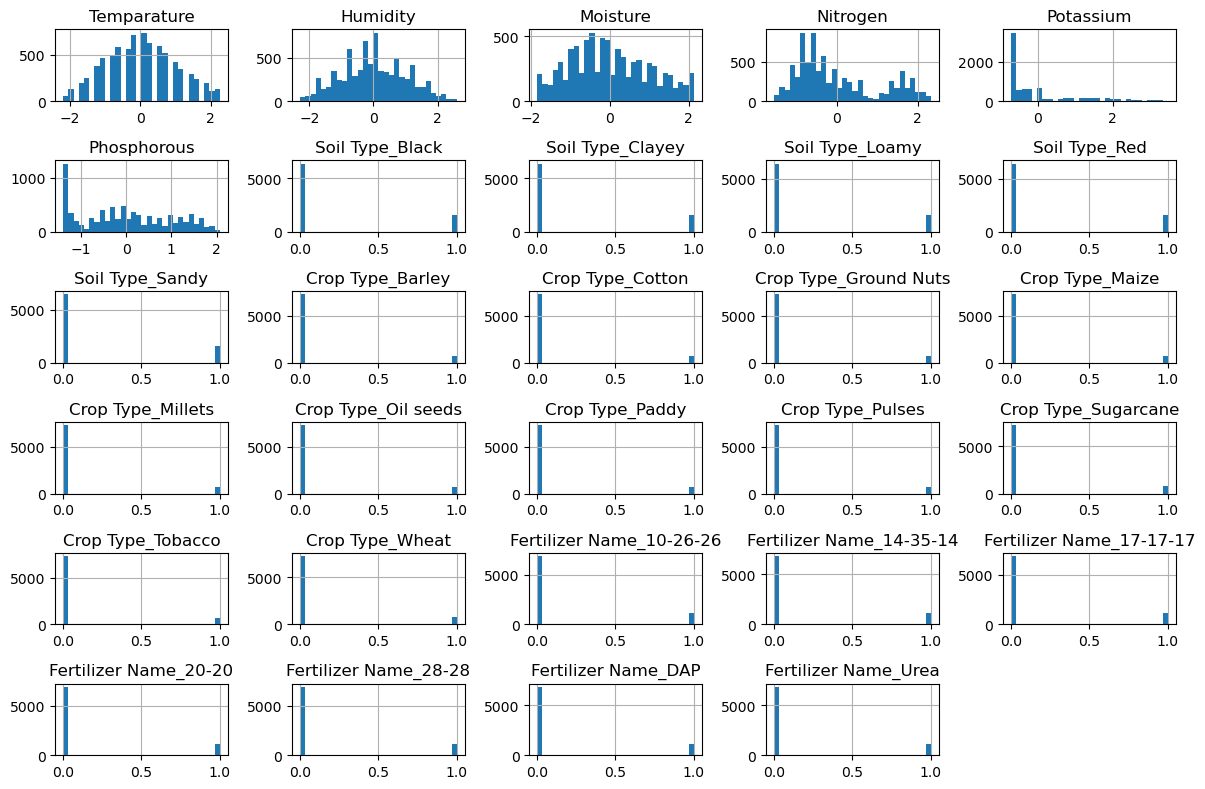

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
allData_encoded.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()


**Potassium and Phosphorous appear right-skewed, with a long tail on the right.**
**Possible Fix: Apply log transformation to reduce skewness:**

In [34]:
import numpy as np

allData_encoded["Potassium"] = np.log1p(allData_encoded["Potassium"])
allData_encoded["Phosphorous"] = np.log1p(allData_encoded["Phosphorous"])


c:\Users\pc\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [35]:
print(allData_encoded.skew())

Temparature                 0.120530
Humidity                    0.056442
Moisture                    0.269009
Nitrogen                    0.749592
Potassium                   0.597267
Phosphorous                -1.191054
Soil Type_Black             1.487641
Soil Type_Clayey            1.477996
Soil Type_Loamy             1.510083
Soil Type_Red               1.506154
Soil Type_Sandy             1.519955
Crop Type_Barley            2.911927
Crop Type_Cotton            2.860525
Crop Type_Ground Nuts       2.834200
Crop Type_Maize             2.780463
Crop Type_Millets           2.871193
Crop Type_Oil seeds         2.890058
Crop Type_Paddy             2.903687
Crop Type_Pulses            2.844671
Crop Type_Sugarcane         2.755577
Crop Type_Tobacco           2.873873
Crop Type_Wheat             2.795609
Fertilizer Name_10-26-26    2.063478
Fertilizer Name_14-35-14    1.977339
Fertilizer Name_17-17-17    2.069423
Fertilizer Name_20-20       2.101077
Fertilizer Name_28-28       2.075395
F

## Visualize Correlations with a Heatmap

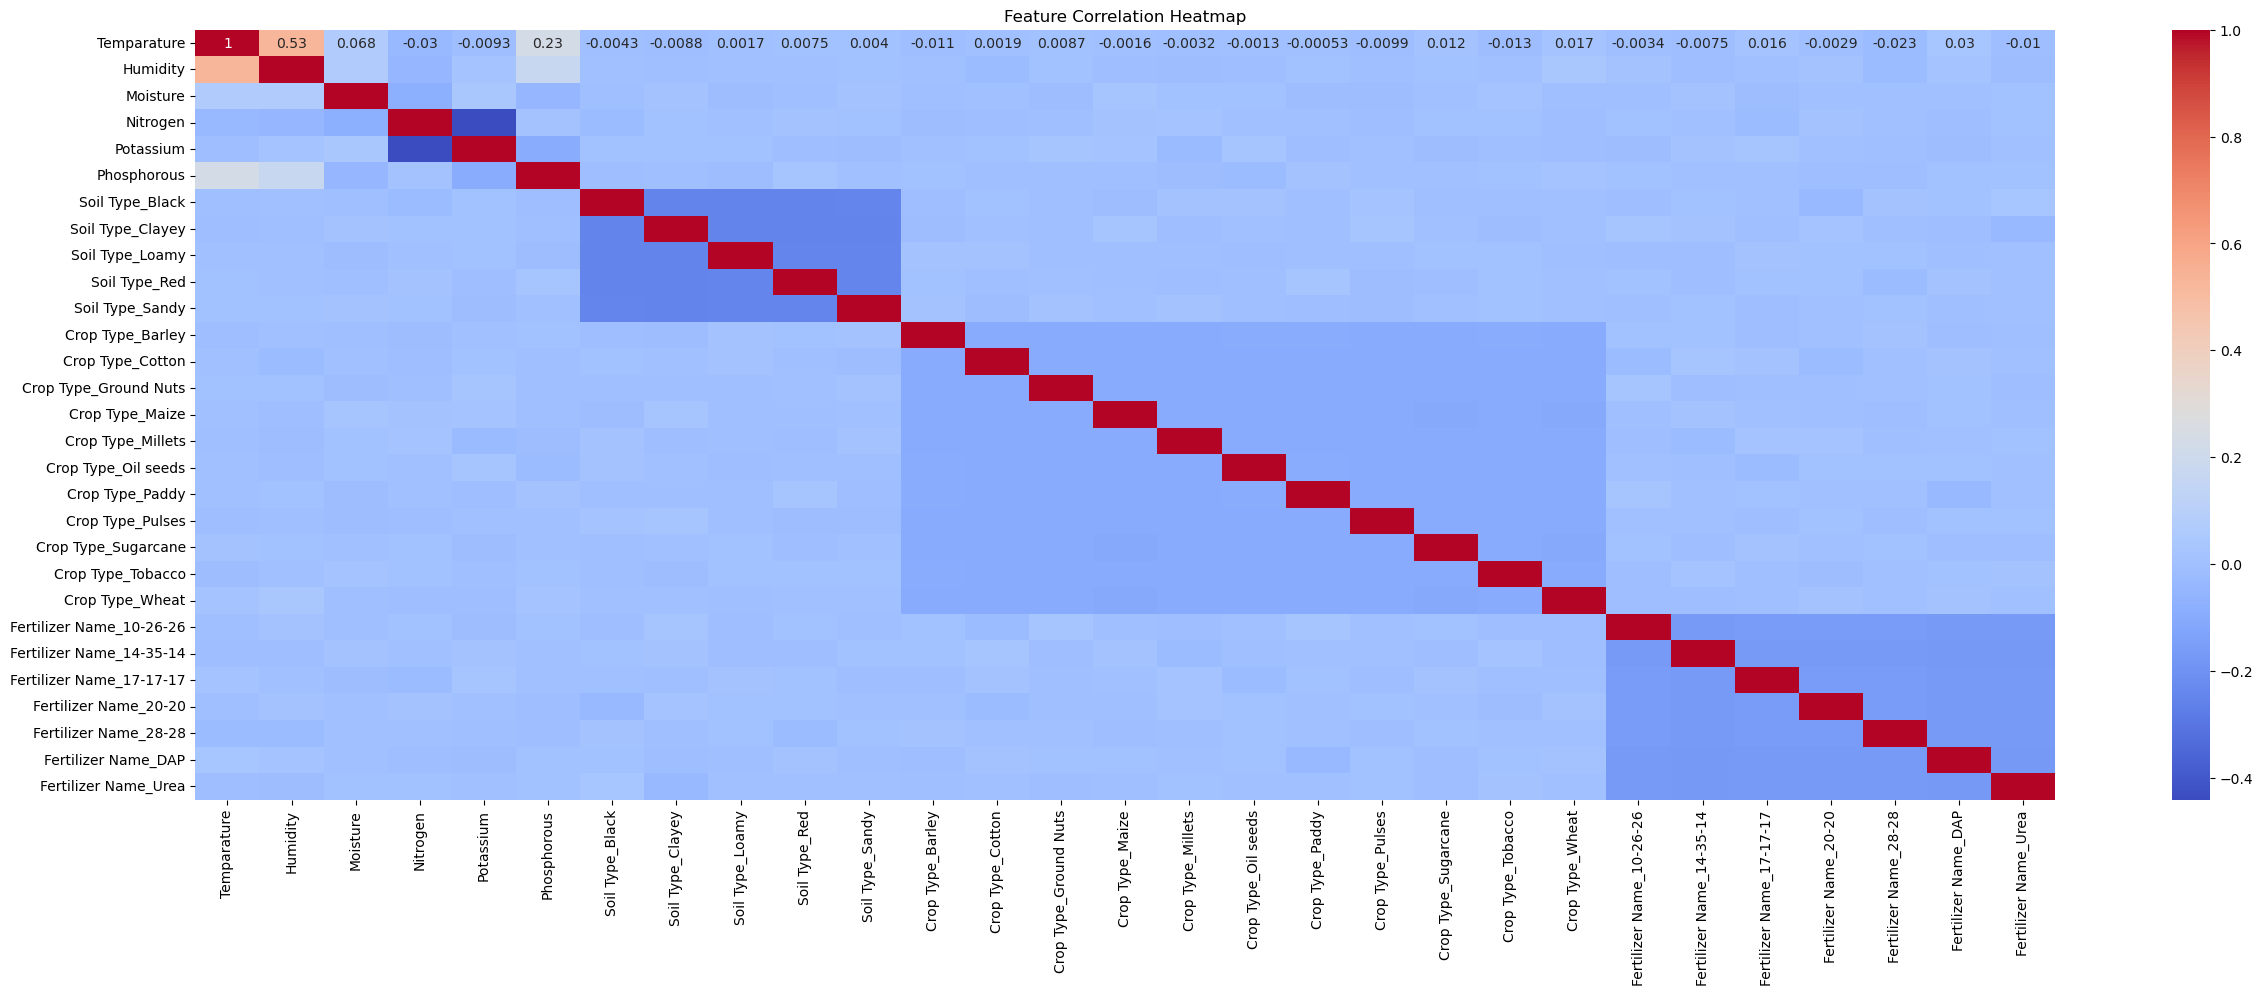

In [44]:
plt.figure(figsize=(30, 10))
sns.heatmap(allData_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()
